In [1]:
import matplotlib.pyplot as plt

In [297]:
import pandas as pd
import janitor

In [369]:
# Read in the dataset
df = pd.read_csv("ramen-ratings.csv")

In [192]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [193]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [374]:
df = df[df['Stars'] != 'Unrated']
df['Stars'] = df['Stars'].astype(float)

In [375]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [377]:
average_ramen = df['Stars'].mean()
average_ramen

3.6546759798214974

In [197]:
good = df[df['Stars'] > average_ramen]
bad = df[df['Stars'] <= average_ramen]

In [198]:
good.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN


In [199]:
bad.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.50,NaN


# What Styles of Ramen are Good?

In [200]:
df['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [201]:
ramen_by_style = df.groupby(['Style']).mean()

In [202]:
ramen_by_style_good = ramen_by_style[ramen_by_style > average_ramen]
ramen_by_style_good['Stars'].dropna()

Style
Bar     5.000000
Bowl    3.670686
Box     4.291667
Pack    3.700458
Name: Stars, dtype: float64

In [203]:
ramen_by_style_bad = ramen_by_style[ramen_by_style < average_ramen]
ramen_by_style_bad['Stars'].dropna()

Style
Can     3.500000
Cup     3.498500
Tray    3.545139
Name: Stars, dtype: float64

Looks like better-than-average ramen are:
- Bar
- Bowl
- Box
- Pack

And worse-than-average ramen are:
- Canned
- In a cup
- In a tray

# Where is Good Ramen From?

In [204]:
# first of all, where is ramen from?
df['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [205]:
ramen_by_country = df.groupby(['Country']).mean()
#ramen_by_country.sort_values('Stars', ascending=False).head()

ramen_by_country

,Review #,Stars
Country,,
Australia,2005.000000,3.138636
Bangladesh,1953.857143,3.714286
Brazil,2093.600000,4.350000
Cambodia,1822.400000,4.200000
Canada,1361.512195,2.243902
China,1327.189349,3.421893
Colombia,1265.500000,3.291667
Dubai,753.000000,3.583333
Estonia,1099.500000,3.500000


In [207]:
ramen_by_country_good = ramen_by_country[ramen_by_country['Stars'] > average_ramen]
ramen_by_country_good['Stars'].sort_values().dropna()

Country
Taiwan           3.665402
Bangladesh       3.714286
Mexico           3.730000
United States    3.750000
South Korea      3.790554
Hong Kong        3.801825
Fiji             3.875000
Myanmar          3.946429
Japan            3.981605
Indonesia        4.067460
Singapore        4.126147
Malaysia         4.154194
Cambodia         4.200000
Sarawak          4.333333
Brazil           4.350000
Name: Stars, dtype: float64

In [257]:
ramen_by_country_bad = ramen_by_country[ramen_by_country < average_ramen]
ramen_by_country_bad['Stars'].sort_values().dropna()

Country
Nigeria        1.500000
Canada         2.243902
Netherlands    2.483333
UK             2.997101
Pakistan       3.000000
Australia      3.138636
Vietnam        3.187963
Sweden         3.250000
Colombia       3.291667
Philippines    3.329787
Thailand       3.384817
India          3.395161
China          3.421893
USA            3.457043
Ghana          3.500000
Estonia        3.500000
Nepal          3.553571
Holland        3.562500
Dubai          3.583333
Finland        3.583333
Hungary        3.611111
Poland         3.625000
Germany        3.638889
Name: Stars, dtype: float64

# Can we Predict whether Ramen will be good?

In [213]:
good_ramen_style_list = ramen_by_style_good['Stars'].dropna().index.unique()
good_ramen_style_list_stars = ramen_by_style_good['Stars'].dropna().unique()

bad_ramen_style_list = ramen_by_style_bad['Stars'].dropna().index.unique()
bad_ramen_style_list_stars = ramen_by_style_bad['Stars'].dropna().unique()

In [214]:
# maybe, might be tricky
df = pd.read_csv("ramen-ratings.csv")

# Let's modify our dataframe to have the mean values we got
good_ratings = dict(zip(good_ramen_style_list, good_ramen_style_list_stars))
bad_ratings = dict(zip(bad_ramen_style_list, bad_ramen_style_list_stars))

ratings = {**bad_ratings, **good_ratings}

ratings

{'Can': 3.5,
 'Cup': 3.4984999999999995,
 'Tray': 3.545138888888889,
 'Bar': 5.0,
 'Bowl': 3.6706860706860707,
 'Box': 4.291666666666667,
 'Pack': 3.7004581151832467}

In [215]:
df['Style_value'] = df['Style'].replace(ratings)
df['Style_label'] = df['Style'].replace(good_ramen_style_list, value=1)
df['Style_label'].replace(bad_ramen_style_list, value=0, inplace=True)

df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Style_value,Style_label
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,3.498500,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,3.700458,1.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,3.498500,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,3.700458,1.0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,3.700458,1.0


In [262]:
good_countries = dict(zip(ramen_by_country_good.index, ramen_by_country_good['Stars']))

try:
    del ramen_by_country_bad['Review #']
except KeyError:
    print("Not there")
    
try:
    ramen_by_country_bad = ramen_by_country_bad['Stars'].dropna()
except KeyError:
    print("already droppped")

bad_countries = dict(zip(ramen_by_country_bad.index, ramen_by_country_bad.values))
country_ratings = {**good_countries, **bad_countries}

country_ratings

Not there
already droppped


{'Bangladesh': 3.7142857142857144,
 'Brazil': 4.35,
 'Cambodia': 4.2,
 'Fiji': 3.875,
 'Hong Kong': 3.8018248175182485,
 'Indonesia': 4.067460317460317,
 'Japan': 3.981605113636364,
 'Malaysia': 4.154193548387097,
 'Mexico': 3.73,
 'Myanmar': 3.9464285714285716,
 'Sarawak': 4.333333333333333,
 'Singapore': 4.126146788990826,
 'South Korea': 3.7905537459283383,
 'Taiwan': 3.665401785714286,
 'United States': 3.75,
 'Australia': 3.1386363636363637,
 'Canada': 2.2439024390243905,
 'China': 3.4218934911242602,
 'Colombia': 3.2916666666666665,
 'Dubai': 3.5833333333333335,
 'Estonia': 3.5,
 'Finland': 3.5833333333333335,
 'Germany': 3.638888888888889,
 'Ghana': 3.5,
 'Holland': 3.5625,
 'Hungary': 3.611111111111111,
 'India': 3.3951612903225805,
 'Nepal': 3.5535714285714284,
 'Netherlands': 2.4833333333333334,
 'Nigeria': 1.5,
 'Pakistan': 3.0,
 'Philippines': 3.3297872340425534,
 'Poland': 3.625,
 'Sweden': 3.25,
 'Thailand': 3.3848167539267022,
 'UK': 2.9971014492753625,
 'USA': 3.4570433

In [275]:
df['Country_value'] = df['Country'].replace(country_ratings)
df['Country_label'] = df['Country'].replace(list(good_countries.keys()), value=1)
df['Country_label'].replace(list(bad_countries.keys()), value=0, inplace=True)

df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Style_value,Style_label,Country_value,Country_label
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,3.498500,0.0,3.981605,1
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,3.700458,1.0,3.665402,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,3.498500,0.0,3.457043,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,3.700458,1.0,3.665402,1
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,3.700458,1.0,3.395161,0


In [274]:
df.to_csv('new_ramen_dataset.csv')

In [308]:
# Adding some jitter to make it separate off the boundaries of the reviews
# This should help the k-means since it gives more significane to to the distance metric used

df = janitor.functions.jitter(
    df=df,
    column_name='Style_value',
    dest_column_name='Style_value_jitter',
    scale=0.1,
    clip=None,
    random_state=None,
)

df = janitor.functions.jitter(
    df=df,
    column_name='Country_value',
    dest_column_name='Country_value_jitter',
    scale=0.1,
    clip=None,
    random_state=None,
)


In [343]:
better_ramen_style = df[df['Style_value'] > average_ramen]
better_ramen_country = df[df['Country_value'] > average_ramen]
better_ramen = better_ramen_style.merge(better_ramen_country)


worse_ramen_style = df[df['Style_value'] <= average_ramen]
worse_ramen_country = df[df['Country_value'] <= average_ramen]
worse_ramen = worse_ramen_style.merge(worse_ramen_country)

#better_ramen['Style_value'].mean(), better_ramen['Country_value'].mean(), worse_ramen['Style_value'].mean(), worse_ramen['Country_value'].mean()
(len(df) - (len(better_ramen) + len(worse_ramen)))

1067

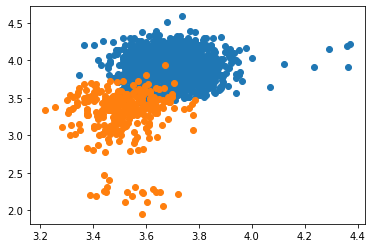

In [342]:
plt.scatter(better_ramen['Style_value_jitter'], better_ramen['Country_value_jitter'])
plt.scatter(worse_ramen['Style_value_jitter'], worse_ramen['Country_value_jitter'])

plt.show()

In [337]:
test_country = 'Taiwan'
test_style = 'Bowl'

test_country_2 = 'Korea'
test_style_2 = 'Pack'


def generate_ramen_point(country: str, style: str):
    try:
        style_value = ratings[style]
        country_value = country_ratings[country]
        print(style_value, country_value)
    except KeyError as e:
        print(f"No data on input {str(e)}")
    
    
generate_ramen_point(test_country, test_style)
generate_ramen_point(test_country_2, test_style_2)

3.6706860706860707 3.665401785714286
No data on input 'Korea'


In [360]:
better_ramen['label'] = 'GOOD'

In [361]:
worse_ramen['label'] = 'BAD'

In [362]:
worse_ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Style_value,Style_label,Country_value,Country_label,Style_value_jitter,Country_value_jitter,label
0,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,3.498500,0.0,3.457043,0,3.487514,3.540047,BAD
1,2541,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,USA,5,NaN,3.498500,0.0,3.457043,0,3.699937,3.557153,BAD
2,2538,Nissin,Cup Noodles Very Veggie Beef Flavor Ramen Nood...,Cup,USA,5,NaN,3.498500,0.0,3.457043,0,3.472149,3.395145,BAD
3,2535,Nissin,Cup Noodles Very Veggie Chicken Flavor Ramen N...,Cup,USA,5,NaN,3.498500,0.0,3.457043,0,3.458815,3.605592,BAD
4,2513,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,USA,3.5,NaN,3.500000,0.0,3.457043,0,3.463731,3.340618,BAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,157,Nissin,Sotanghon,Cup,Philippines,2,NaN,3.498500,0.0,3.329787,0,3.436894,3.287358,BAD
294,156,Maruchan,Instant Lunch Cajun Style With chili Piquin Sh...,Cup,USA,3,NaN,3.498500,0.0,3.457043,0,3.545600,3.469000,BAD
295,154,Nissin,Creamy Chicken,Cup,USA,1.75,NaN,3.498500,0.0,3.457043,0,3.348925,3.626128,BAD
296,153,Sapporo Ichiban,Shrimp Flavor,Cup,USA,1.75,NaN,3.498500,0.0,3.457043,0,3.319839,3.351370,BAD


In [363]:
final_df = better_ramen.append(worse_ramen)

In [364]:
final_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Style_value,Style_label,Country_value,Country_label,Style_value_jitter,Country_value_jitter,label
0,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,3.700458,1.0,3.665402,1,3.841945,3.697278,GOOD
1,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,3.700458,1.0,3.665402,1,3.622133,3.767675,GOOD
2,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN,3.700458,1.0,3.790554,1,3.627783,3.774688,GOOD
3,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN,3.700458,1.0,3.981605,1,3.819662,3.996573,GOOD
4,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN,3.700458,1.0,4.126147,1,3.930415,4.020176,GOOD


In [365]:
final_df['label'].unique()

array(['GOOD', 'BAD'], dtype=object)

In [366]:
final_df.to_csv('final_ramen.csv')